In [1]:
import pandas as pd

In [41]:
# Read the data
df = pd.read_csv("sample_data.csv")

In [6]:
df.head()

,Unnamed: 0,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,device_model_int
0,0,0,14102100,1005,0,1,2,15706,320,50,1722,0,35,-1,79,-4536565594672005814
1,1,0,14102100,1005,0,1,0,15704,320,50,1722,0,35,100084,79,-80052322344914806
2,2,0,14102100,1005,0,1,0,15704,320,50,1722,0,35,100084,79,-3130634972019121531
3,3,0,14102100,1005,0,1,0,15706,320,50,1722,0,35,100084,79,-8587292268327570678
4,4,0,14102100,1005,1,1,0,18993,320,50,2161,0,35,-1,157,-7699311560514132401


In [7]:
df.shape

(100000, 16)

In [9]:
# Define X and y
X = df.loc[:, ~df.columns.isin(['click'])]
y = df.click

# Sample CTR
print("Sample CTR :\n", 
      y.sum()/len(y))

Sample CTR :
 0.1749


In [10]:
# Distribution of values for device type
print("Distribution of device type: ")
print(X.device_type.value_counts()/len(X))

Distribution of device type: 
1    0.92597
0    0.04212
4    0.02979
5    0.00212
Name: device_type, dtype: float64


In [11]:
# Sample CTR by device type 
print("CTR by device type: ")
print(df.groupby('device_type')['click'].sum()/len(y))

CTR by device type: 
device_type
0    0.00958
1    0.16295
4    0.00216
5    0.00021
Name: click, dtype: float64


In [12]:
# Distribution of values for banner position
print("Distribution of banner position: ")
print(X.banner_pos.value_counts()/len(X))

Distribution of banner position: 
0    0.80249
1    0.19714
2    0.00021
5    0.00010
4    0.00006
Name: banner_pos, dtype: float64


In [13]:
# Sample CTR by banner position
print("CTR by banner position: ")
print(df.groupby('banner_pos')['click'].sum()/len(y))

CTR by banner position: 
banner_pos
0    0.13599
1    0.03883
2    0.00003
4    0.00001
5    0.00004
Name: click, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define training and testing
X_train, X_test, y_train, y_test = \
	train_test_split(X, y, test_size = .2, random_state = 0)

# Create decision tree classifier
clf = DecisionTreeClassifier()

# Train classifier - predict label and evaluate accuracy
y_pred = clf.fit(X_train, y_train).predict(X_test) 
print(accuracy_score(y_test, y_pred))

0.74125


In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Train classifier - predict probability score and label
y_score = clf.fit(X_train, y_train).predict_proba(X_test) 
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Get ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.5534160982908713


#### Exploratory Data Analysis

In [24]:
# check the columns
df.columns

Index(['Unnamed: 0', 'click', 'hour', 'C1', 'banner_pos', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'device_model_int'],
      dtype='object')

In [25]:
df.dtypes

Unnamed: 0          int64
click               int64
hour                int64
C1                  int64
banner_pos          int64
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
device_model_int    int64
dtype: object

In [29]:
df.select_dtypes(include = ['int64','float'])

,Unnamed: 0,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,device_model_int
0,0,0,14102100,1005,0,1,2,15706,320,50,1722,0,35,-1,79,-4536565594672005814
1,1,0,14102100,1005,0,1,0,15704,320,50,1722,0,35,100084,79,-80052322344914806
2,2,0,14102100,1005,0,1,0,15704,320,50,1722,0,35,100084,79,-3130634972019121531
3,3,0,14102100,1005,0,1,0,15706,320,50,1722,0,35,100084,79,-8587292268327570678
4,4,0,14102100,1005,1,1,0,18993,320,50,2161,0,35,-1,157,-7699311560514132401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,14102100,1005,0,1,0,21611,320,50,2480,3,297,100111,61,137884114573136964
99996,99996,0,14102100,1005,0,1,0,15702,320,50,1722,0,35,-1,79,-80052322344914806
99997,99997,1,14102100,1005,0,1,0,15702,320,50,1722,0,35,-1,79,-6842687763310561140
99998,99998,0,14102100,1005,0,1,0,15708,320,50,1722,0,35,-1,79,-3130634972019121531


In [ ]:
# Print columns
print(df.columns)

# Print data types of columns
print(df.dtypes)

# Select and print numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])
print(numeric_df.columns)


# Select and print categorical columns 
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.columns)

In [30]:
# Missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
Unnamed: 0          100000 non-null int64
click               100000 non-null int64
hour                100000 non-null int64
C1                  100000 non-null int64
banner_pos          100000 non-null int64
device_type         100000 non-null int64
device_conn_type    100000 non-null int64
C14                 100000 non-null int64
C15                 100000 non-null int64
C16                 100000 non-null int64
C17                 100000 non-null int64
C18                 100000 non-null int64
C19                 100000 non-null int64
C20                 100000 non-null int64
C21                 100000 non-null int64
device_model_int    100000 non-null int64
dtypes: int64(16)
memory usage: 12.2 MB


In [33]:
df.isnull().sum(axis = 0)

Unnamed: 0          0
click               0
hour                0
C1                  0
banner_pos          0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
device_model_int    0
dtype: int64

In [34]:
df.isnull().sum(axis = 0).sum()

0

In [ ]:
# Print info
print(df.info())

# Print missing values by column 
print(df.isnull().sum(axis = 0))

# Print total number of missing values in rows
print(df.isnull().sum(axis = 1).sum())

In [ ]:
# Distribution of values for banner position
print("Distribution of banner position: ")
print(X.banner_pos.value_counts()/len(X))

# Sample CTR by banner position
print("CTR by banner position: ")
print(df.groupby('banner_pos')['click'].sum()/len(y))

In [ ]:
# looking at distributions
df.groupby(['search_engine_type',
           'click']).size()

In [ ]:
df.grouby(['search_engine_type','click']).size().unstack()
df.reset_index()

In [ ]:
# Construct bar chart for clicks by search engine type
se_df = df.groupby(['search_engine_type', 'click']).size().unstack()
se_df.plot(kind = 'bar', title = 'Value frequency for search engine type')
plt.show()

# Reset index and rename columns
se_df = se_df.reset_index()
se_df.rename(columns = {0: 'non_clicks', 1: 'clicks'}, inplace = True)

# Compute CTR using clicks and non clicks
se_df['total'] = se_df['non_clicks'] + se_df['clicks']
se_df['CTR'] = se_df['clicks'] / se_df['total']

# Print CTR by search engine type
print(se_df[['search_engine_type', 'clicks', 'total', 'CTR']])

   Unnamed: 0  click       hour    C1  banner_pos  device_type  \
0           0      0 2014-10-21  1005           0            1   
1           1      0 2014-10-21  1005           0            1   
2           2      0 2014-10-21  1005           0            1   
3           3      0 2014-10-21  1005           0            1   
4           4      0 2014-10-21  1005           1            1   

   device_conn_type    C14  C15  C16   C17  C18  C19     C20  C21  \
0                 2  15706  320   50  1722    0   35      -1   79   
1                 0  15704  320   50  1722    0   35  100084   79   
2                 0  15704  320   50  1722    0   35  100084   79   
3                 0  15706  320   50  1722    0   35  100084   79   
4                 0  18993  320   50  2161    0   35      -1  157   

      device_model_int  hour_of_day  
0 -4536565594672005814            0  
1   -80052322344914806            0  
2 -3130634972019121531            0  
3 -8587292268327570678            0 

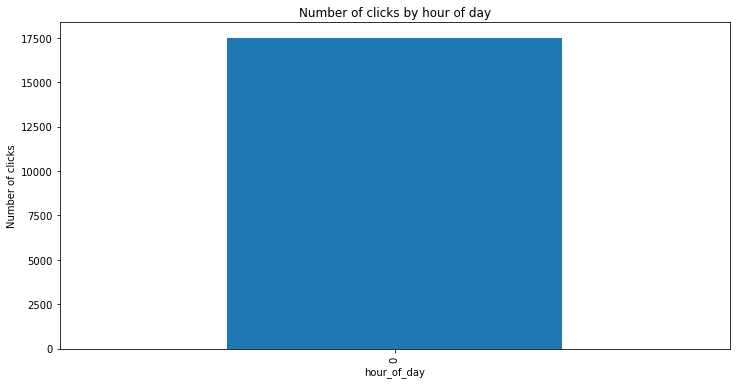

In [43]:
from matplotlib import pyplot as plt
import datetime as dt

# Change the hour column to a datetime and extract hour of day
df['hour'] = pd.to_datetime(df['hour'], format = '%y%m%d%H')
df['hour_of_day'] = df['hour'].dt.hour
# print(df.head(5))

# Get and plot total clicks by hour of day
df.groupby('hour_of_day')['click'].sum().plot.bar(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour of day')
plt.show()

In [ ]:
# Get categorical columns
categorical_cols = df.select_dtypes(
  include = ['object']).columns.tolist()
print("Categorical columns: ")
print(categorical_cols)

# Iterate over categorical columns and apply hash function
for col in categorical_cols:
	df[col] = df[col].apply(lambda x: hash(x))

# Print examples of new output
print(df.head(5))

In [ ]:
# Get counts of total and unique values for given features
feature_list = ["search_engine_type", "product_type", "advertiser_type"]
for feature in feature_list:
	print(df[feature].count())
	print(df[feature].nunique())

# Define new features as counts
new_feature_list = ['device_id', 'site_id'] + feature_list
for new_feature in new_feature_list:
  df[new_feature + '_count'] = df.groupby(
    new_feature)['click'].transform("count")
print(df.head(5))

In [ ]:
# Select numeric columns and print median variance
num_df = df.select_dtypes(include=['int', 'float'])
filter_cols = ['click', 'banner_pos', 'device_type',
               'search_engine_type', 'product_type', 'advertiser_type']
new_df = num_df[num_df.columns[~num_df.columns.isin(filter_cols)]]
median = new_df.var().median()
print(median)

# Apply log normalization on columns with higher than median variance
change_cols = new_df.columns[new_df.var() > median].tolist()
new_df[change_cols] = new_df[change_cols].apply(
  lambda x: np.log(x))
print(new_df.var().median())

In [ ]:
# Get non-categorical columns, with a filter
num_df = df.select_dtypes(include=['int', 'float'])
filter_cols = ['click', 'banner_pos', 'device_type',
               'search_engine_type', 'product_type', 'advertiser_type']
new_df = num_df[num_df.columns[~num_df.columns.isin(filter_cols)]]
num_cols = new_df.columns

# Transform columns using StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Print mean and variance of transformed columns
print(df[num_cols].mean())
print(df[num_cols].var())

In [ ]:
from sklearn.metrics import confusion_matrix

# Set up classifier using training data to predict test data
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size = .2, random_state = 0)
clf = DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Define confusion matrix and four categories
conf_matrix = confusion_matrix(y_test, y_pred)
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

print("TN: %s, FP: %s, FN: %s, TP: %s" %(tn, fp, fn, tp))

In [ ]:
# Compute confusion matrix and get four categories
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate total return, total spent, and ROI
r = 0.2
cost = 0.05
total_return = tp * r
total_cost = (tp + fp) * cost 
roi = total_return / total_cost
print("Total return: %s, Total cost: %s, ROI: %s" %(
  total_return, total_cost, roi))

In [ ]:
# Set up training and testing split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size = .2, random_state = 0)

# Create classifier and make predictions
clf = DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Evaluate precision and recall
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))

In [ ]:
# Set up baseline predictions
y_pred = np.asarray([0 for x in range(len(X_test))])

# Look at confusion matrix
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

# Check precision and recall
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))

In [ ]:
# Create and fit decision tree classifier
clf = DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Calculate total return, total spent, and ROI 
r, cost = 0.2, 0.05
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
total_return = tp * r
total_spent = (tp + fp) * cost 
roi = total_return / total_spent
print("Total return: %s, Total spent: %s, ROI: %s" %(total_return, total_spent, roi))

In [ ]:
# Iterate over different levels of max depth
for max_depth_val in [2, 3, 5, 10, 15, 20]:
  # Create and fit model
  clf = DecisionTreeClassifier(max_depth = max_depth_val)
  print("Evaluating tree with max_depth = %s" %(max_depth_val))
  y_pred = clf.fit(X_train, y_train).predict(X_test) 
  
  # Evaluate confusion matrix, precision, recall
  print("Confusion matrix: ")
  print(confusion_matrix(y_test, y_pred))
  prec = precision_score(y_test, y_pred, average = 'weighted')
  recall = recall_score(y_test, y_pred, average = 'weighted')
  print("Precision: %s, Recall: %s" %(prec, recall))

In [ ]:
# Create model 
clf = DecisionTreeClassifier()

# Set up k-fold
k_fold = KFold(n_splits = 4, random_state = 0)

# Evaluate precision and recall for each fold
precision = cross_val_score(
  clf, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
recall = cross_val_score(
  clf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
print("Precision scores: %s" %(precision)) 
print("Recall scores: %s" %(recall))

In [ ]:
# Iterate over different levels of max depth and set up k-fold
for max_depth_val in [3, 5, 10]:
  k_fold = KFold(n_splits = 4, random_state = 0)
  clf = DecisionTreeClassifier(max_depth = max_depth_val)
  print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
  y_pred = clf.fit(X_train, y_train).predict(X_test) 
  
  # Calculate precision for cross validation and test
  cv_precision = cross_val_score(
    clf, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
  precision = precision_score(y_test, y_pred, average = 'weighted')
  print("Cross validation Precision: %s" %(cv_precision))
  print("Test Precision: %s" %(precision))

In [ ]:
# Create random forest classifier with specified params
clf = RandomForestClassifier(n_estimators = 50, max_depth = 5)

# Train classifier - predict probability score and label
y_score = clf.fit(X_train, y_train).predict_proba(X_test) 
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Get ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
print("ROC of AUC: %s"%(auc(fpr, tpr)))

# Get precision and recall
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(precision, recall))

In [ ]:
# Create list of hyperparameters 
n_estimators = [10, 50]
max_depth = [5, 20]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}

# Use Grid search CV to find best parameters 
print("starting RF grid search.. ")
rf = RandomForestClassifier()
clf = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc')
clf.fit(X_train, y_train)
print("Best Score: ")
print(clf.best_score_)
print("Best Estimator: ")
print(clf.best_estimator_)

#### Deep learning

In [ ]:
# Scale features and split into training and testing
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size = .2, random_state = 0)

# Create classifier and produce predictions
clf = MLPClassifier(hidden_layer_sizes = (8, ), max_iter = 100)
y_score = clf.fit(X_train, y_train).predict_proba(X_test) 
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Get accuracy and AUC of ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
print("Accuracy: %s" %(accuracy_score(y_test, y_pred)))
print("ROC of AUC curve: %s" %(roc_auc))

In [ ]:
# Loop over various max_iter configurations
max_iter_list = [10, 20, 30]
for max_iter in max_iter_list:
	clf = MLPClassifier(hidden_layer_sizes = (4, ), 
                        max_iter = max_iter, random_state = 0)
   	# Extract relevant predictions
	y_score = clf.fit(X_train, y_train).predict_proba(X_test)
	y_pred = clf.fit(X_train, y_train).predict(X_test)

	# Get ROC curve metrics
	print("Accuracy for max_iter = %s: %s" %(
      max_iter, accuracy_score(y_test, y_pred)))
	print("AUC for max_iter = %s: %s" %(
      max_iter, roc_auc_score(y_test, y_score[:, 1])))

In [ ]:
# Create and loop over various hidden_layer_sizes configurations
hidden_layer_sizes_list = [(4, ), (8, ), (16, )]
for hidden_layer_sizes in hidden_layer_sizes_list:
	clf = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, 
                        max_iter = 10, random_state = 0)
   	# Extract relevant predictions
	y_score = clf.fit(X_train, y_train).predict_proba(X_test)
	y_pred = clf.fit(X_train, y_train).predict(X_test)

	# Get ROC curve metrics
	print("Accuracy for hidden_layer_sizes = %s: %s" %(
      hidden_layer_sizes, accuracy_score(y_test, y_pred)))
	print("AUC for hidden_layer_sizes = %s: %s" %(
      hidden_layer_sizes, roc_auc_score(y_test, y_score[:, 1])))

In [ ]:
# Create list of hyperparameters 
max_iter = [10, 20]
hidden_layer_sizes = [(8, ), (16, )]
param_grid = {'max_iter': max_iter, 'hidden_layer_sizes': hidden_layer_sizes}

# Use Grid search CV to find best parameters using 4 jobs
mlp = MLPClassifier()
clf = GridSearchCV(estimator = mlp, param_grid = param_grid, 
           scoring = 'roc_auc', n_jobs = 4)
clf.fit(X_train, y_train)
print("Best Score: ")
print(clf.best_score_)
print("Best Estimator: ")
print(clf.best_estimator_)   

In [ ]:
# Set up MLP classifier, train and predict
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size = .2, random_state = 0)
clf = MLPClassifier(hidden_layer_sizes = (16, ), 
                    max_iter = 10, random_state = 0)
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Evaluate precision and recall
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
fbeta = fbeta_score(y_test, y_pred, beta = 0.5, average = 'weighted')
print("Precision: %s, Recall: %s, F-beta score: %s" %(prec, recall, fbeta))

In [ ]:
# Get precision and total ROI
prec = precision_score(y_test, y_pred, average = 'weighted')
r = 0.2
cost = 0.05 
roi = prec * r / cost

# Get AUC
roc_auc = roc_auc_score(y_test, y_score[:, 1])

print("Total ROI: %s, Precision: %s, AUC of ROC curve: %s" %(
  roi, prec, roc_auc))

In [ ]:
# Create the list of models in the order below
names = ['Random Forest', 'Multi-Layer Perceptron']
classifiers = [RandomForestClassifier(), 
               MLPClassifier(hidden_layer_sizes = (10, ),
                             max_iter = 40)]

# Produce a confusion matrix for all classifiers
for name, classifier in zip(names, classifiers):
  print("Evaluating classifier: %s" %(name))
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  conf_matrix = confusion_matrix(y_test, y_pred)
  print(conf_matrix)

In [ ]:
# Create classifiers
clfs = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), 
        MLPClassifier(hidden_layer_sizes = (10, ), max_iter = 50)]

# Produce all evaluation metrics for each classifier
for clf in clfs:
  print("Evaluating classifier: %s" %(print_estimator_name(clf)))
  y_score = clf.fit(X_train, y_train).predict_proba(X_test)
  y_pred = clf.fit(X_train, y_train).predict(X_test)
  prec = precision_score(y_test, y_pred, average = 'weighted')
  recall = recall_score(y_test, y_pred, average = 'weighted')
  fbeta = fbeta_score(y_test, y_pred, beta = 0.5, average = 'weighted')
  roc_auc = roc_auc_score(y_test, y_score[:, 1])
  print("Precision: %s: Recall: %s, F-beta score: %s, AUC of ROC curve: %s" 
        %(prec, recall, fbeta, roc_auc))